# Function and class definitions:

## import Libraries and define parameters

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import FS3
import scipy as sp
import Plot_definitions as pld
import Collected_runs as cr

mpl.rcParams.update(
    {
        "text.usetex": False,
        "font.family": "serif",
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "font.family": "STIXGeneral",
        "axes.unicode_minus": True,
        "axes.labelsize": 21,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 16,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.major.top": "on",
        "xtick.major.bottom": "on",
        "ytick.major.left": "on",
        "ytick.major.right": "on",
        "xtick.top": True,
        "ytick.right": True,
        "figure.autolayout": True,
    }
)

plt.close('all')

## Dictionaries for start parameters, gRange and LRange

In [32]:
parameter_dictT = {
    "path_to_data": "/home/daniel/Master_thesis/Data/Leo4DataT/",
    "alpha": np.array([1.5, 2.0, 2.25, 2.5, 2.75, 3.0]),
    "sigma": ["_Tsm050", "_Ts000", "_Ts025", "_Ts050", "_Ts075", "_Ts100"],
    "gRange": [
        np.array([2.425, 2.455]),
        np.array([1.339, 1.348]),
        np.array([1.092, 1.104]),
        np.array([0.914, 0.926]),
        np.array([0.76, 0.785]),
    ],
    "LRange": np.array(
        [[64, 256], [64, 256], [64, 256], [64, 256], [64, 256], [64, 256]]
    ),
    "gc": np.array([2.436, 1.34227, 1.097, 0.917, 0.775, 0.66]),
    "nu": np.array([0.976, 1.01, 1.05, 1.41, 2.0, 1.8]),
    "z": np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
    "eta": np.array([0.997, 0.935, 0.8, 0.66, 0.5, 0.4]),
    # "chiMax": [9.0, 100.9, 800.4, 100.4, 30000, 50000],
    # "rho_L_power": [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    # "JRange": [np.array([4.9,5.2]),np.array([2.89,2.90]),np.array([2.15,2.17]),np.array([0,2.18]),np.array([0,2.18])],
    # "J0": [5.1,2.895,2.165,1.89,2.17],
    # "nuJ": [1.0,1.0,1.2,1.0,1.0],
    # "chiMaxJ": [[1.0,126],[10000,10000],[10000,10000],[10000,10000],[10000,10000]]
}

parameter_dictJ = {
    "path_to_data": "/home/daniel/Master_thesis/Data/Leo4DataJ/",
    "alpha": np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0]),
    "sigma": ["_Jsm050", "_Js000", "_Js050", "_Js100", "_Js150", "_Js200"],
    "gRange": [
        np.array([9.94, 10.02]),
        np.array([5.78, 5.805]),
        np.array([4.3, 4.345]),
        np.array([3.58, 3.61]),
        np.array([3.178, 3.19]),
        np.array([2.932, 2.95]),
    ],
    "LRange": np.array(
        [[32, 128], [32, 128], [32, 128], [32, 128], [32, 128], [32, 128]]
    ),
    "gc": np.array([9.985, 5.802, 4.33, 3.595, 3.1835, 2.942]),
    "nu": np.array([0.745, 0.736, 0.75, 0.75, 0.723, 0.71]),
    "z": np.array([0.0, 0.23, 0.6, 1.0, 1.0, 1.0]),
    "eta": np.array([1.33, 1.30, 1.25, 1.1, 1.0, 1.0]),
    # "chiMax":  np.array([100000.0, 100000.0, 150000.0, 20000, 8000.0]),
    # "nuJ": [1.0,1.0,1.2,1.0,1.0],
    # "chiMaxJ": [[1.0,126],[10000,10000],[10000,10000],[10000,10000],[10000,10000]]
}

# $\nu$:
## Binder Cumulant: $U_2(\tau,L)=f_{U_2}(\tau L^{1/\nu}) \cdot (1 + c L^{-\omega})$
### Get Data

chi2/d.o.f = 1.45          
gc = 2.9426(1)
nu = 0.718(4)
c = 1.60(5)
omega = 0.032(5)
a0 = 0.237(6)
a1 = -0.0497(6)
a2 = -0.0036(2)



/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


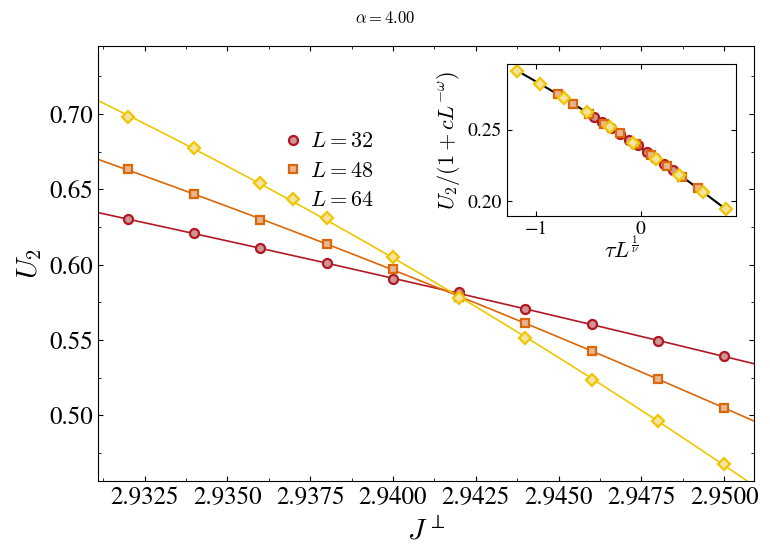

In [42]:
plt.close("all")
dic = parameter_dictJ
alpha = 4.0


index = list(dic["alpha"]).index(alpha)
path = [dic["path_to_data"]+ "runs" + dic["sigma"][index],
        #"/home/daniel/Master_thesis/Data/runs_Js000",
        ]
cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=dic["LRange"][index], gRange=dic["gRange"][index])

# for run in cl_runs.L_dict[256]:
#     print(run.alpha,run.params["Lx"],run.g_param,len(run.data["bins"]))

data, binder_fig, binder_ax = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="binder",
    plot=False,
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc-1)*L**(1/nu))*(1 + c*L**(-omega))",
    #fstring="f((x/gc - 1)*L**(1/nu))",
    vars=["gc", "nu", "c", "omega"],
    polyOrder=2,
)

fit_res = cr.fit_data(data, fitFunc, start_params=[dic["gc"][index],dic["nu"][index]], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
var = fitFunc.unpack(params)
dvar = fitFunc.unpack(dparams)

fig = cr.plot_fit(
    data,
    fitFunc,
    fit_res,
    xlabel=r"$J^{\perp}$",
    ylabel=r"$U_2$",
    loc_legend=(0.25, 0.6, 0.18),
)
fig.suptitle(r"$\alpha = %.2f $" % (alpha))

dataCollapse, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="binder",
    xfunc="(x/gc-1)*L**(1./nu)",
    yfunc="y/(1 + c*L**(-omega))",
    arg=var,
)

inset = cr.plot_DataCollapse(
    dataCollapse,
    fitFunc,
    fit_res,
    xlabel=r"$\tau L^{\frac{1}{\nu}}$",
    ylabel=r"$U_2/(1+cL^{-\omega})$",
    insetFigure=fig,
    loc=3,
)

### Histograms for $g_c, \nu, c, \omega, a_i$

In [ ]:
params_list = []
dparams_list = []
chi_list = []


for n in range(1000):
    fit_res = cr.fit_data(
        cr.resample(data),
        fitFunc,
        start_params=[dic["gc"][index], dic["nu"][index]],
        fitSummary=False,
    )
    params, dparams, redChi2, mesg, ierr = fit_res
    params_list.append(params)
    dparams_list.append(dparams)
    chi_list.append(redChi2)

hist_data = {}
hist_data["chi2"] = chi_list

for i in range(len(fitFunc.vars)):
    name = fitFunc.vars[i]
    err_name = "d" + fitFunc.vars[i]
    hist_data[name] = np.array(params_list)[:, i]
    hist_data[err_name] = np.array(dparams_list)[:, i]


pd.DataFrame.from_dict(hist_data).to_csv("hist_binder_alpha%.2f.csv"%dic["alpha"][index])

<lambdifygenerated-1618>:2: RuntimeWarning: overflow encountered in scalar power
  return (1 + L**(-omega)*c)*(L**(3/nu)*a3*(-1 + x/gc)**3 + L**(2/nu)*a2*(-1 + x/gc)**2 + L**(nu**(-1.0))*a1*(-1 + x/gc) + a0)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res) ** 2)
<lambdifygenerated-1618>:2: RuntimeWarning: overflow encountered in scalar power
  return (1 + L**(-omega)*c)*(L**(3/nu)*a3*(-1 + x/gc)**3 + L**(2/nu)*a2*(-1 + x/gc)**2 + L**(nu**(-1.0))*a1*(-1 + x/gc) + a0)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/M

nu = 0.723571 +- 0.001292
[2.000000, 0.723571, 0.001292],


/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


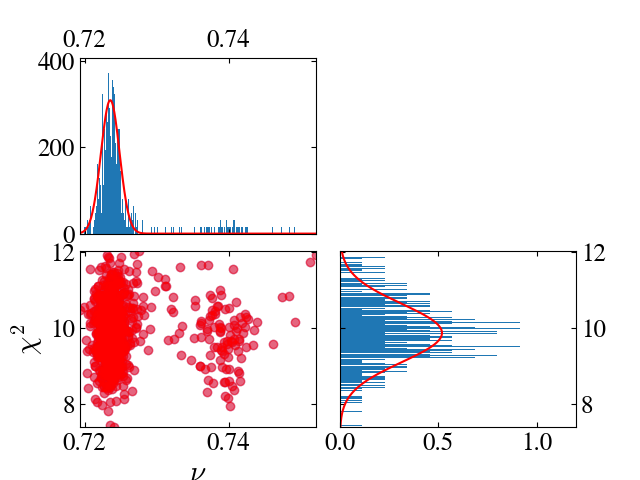

In [48]:
plt.close("all")

dic = parameter_dictJ
alpha = 2.0


index = list(dic["alpha"]).index(alpha)

hist_df = pd.read_csv("/home/daniel/Master_thesis/DataHistJ/hist_binder_alpha%.2f.csv" % dic["alpha"][index])

paramsx, paramsy = cr.scatter_histograms(
    hist_df["nu"],
    hist_df["chi2"],
    hist_df["chi2"],
    num_bins=500,
    maxChi=12.50,
    xlabel=r"$\nu$",
    ylabel=r"$\chi^2$",
)

print(
    "nu = %f +- %f" % (paramsx[0], paramsx[1])
)

print("[%f, %f, %f]," % (alpha, paramsx[0], paramsx[1]))
#print("[%f, %f, %f]," % (alpha, paramsy[0], paramsy[1]))

### "Fit" with hand:

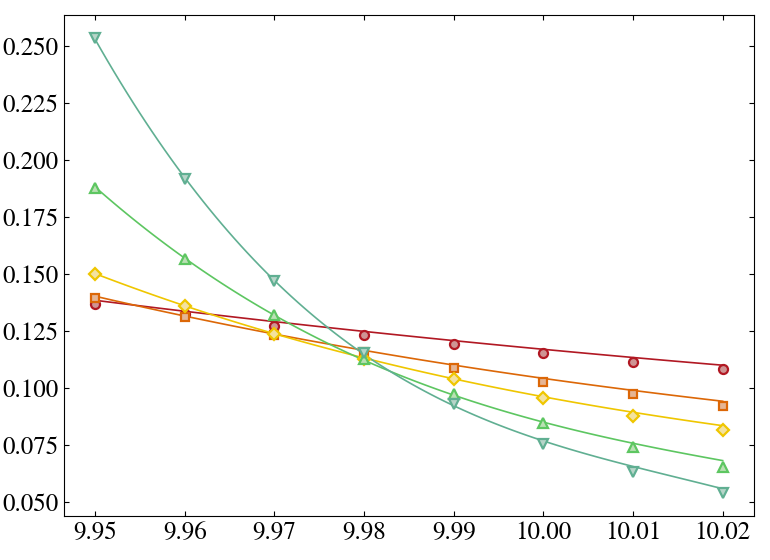

In [102]:
fig,ax0 = FS3.figure()

x = np.linspace(dic["gRange"][index][0],dic["gRange"][index][1],100)

for L in np.sort(list(data), axis=0):
    y = fitFunc.func(x,L,params=[9.987,0.743,7.5,0.85,0.0875,-0.027,0.0075,-0.0013])

    ax0.errorbar(
                    data[L][:, 0],
                    data[L][:, 1],
                    **FS3.errorbarStyle(L),
                    linestyle="",
                )

    ax0.plot(x,y, **FS3.plotStyle(L), linestyle="-")

Crossing Points for gc:

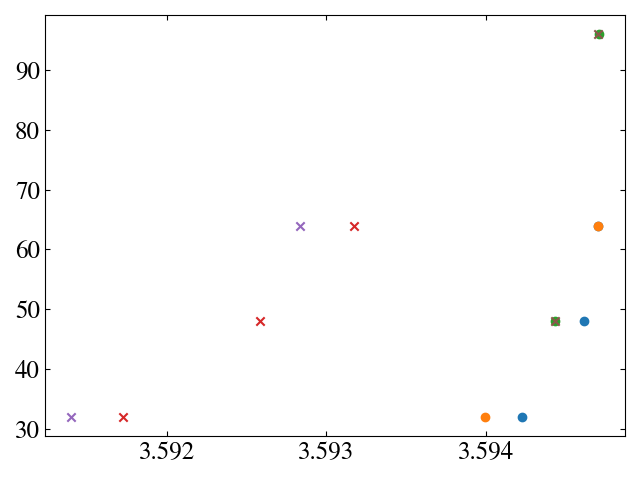

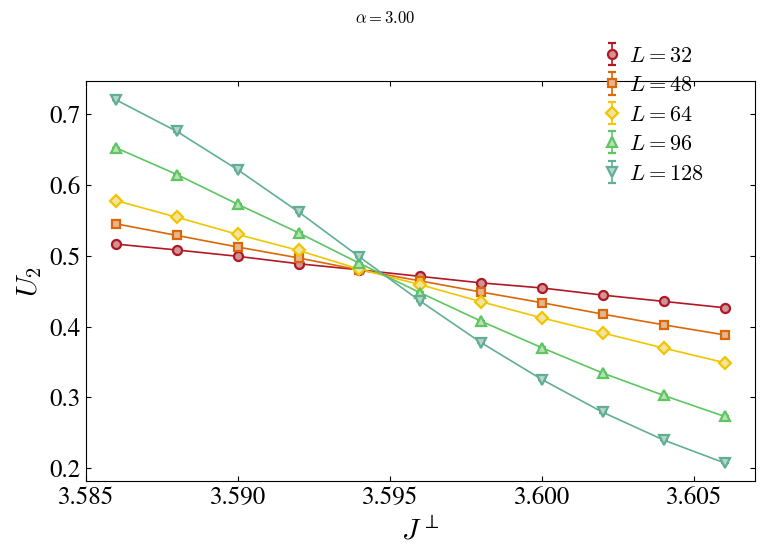

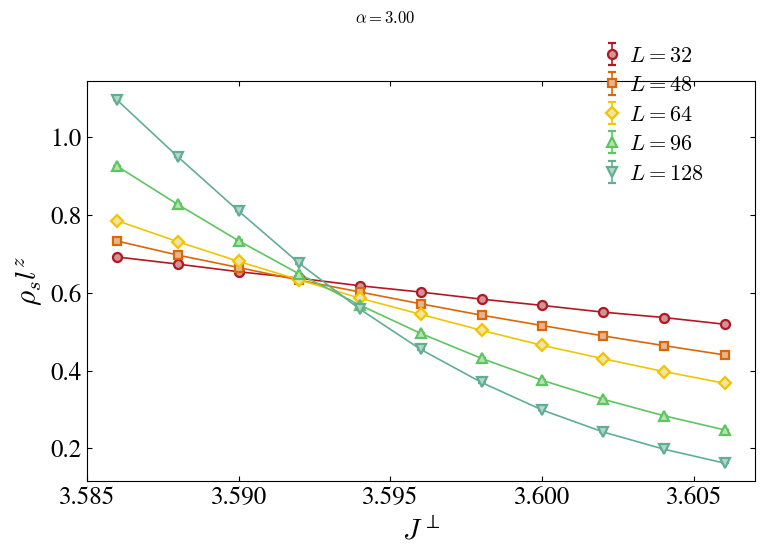

In [8]:
plt.close("all")
path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js100",
        #"/home/daniel/Master_thesis/Data/runs_Js000",
        ]

cl_runs = cr.collected_runs(path, True, cutoff=100)

# for run in cl_runs.runs:
#     print(run.params["Lx"],run.g_param,len(run.data["bins"]))

cl_runs.select(LRange=[0], gRange=[0])

data_binder, fig, ax = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="binder",
    plot=True
)

data_rho, fig, ax = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
    plot=True,
    yfunc="y*L**(0.75)",
    ylabel=r"$l^z$"
)

L_space = np.linspace(8,96,100)
fig2,ax = plt.subplots()


def g_cross_fit(L,a,omega):
    return 5.795 + a*L**(-omega)

Lset,xpoints = FS3.crossingPoints(data_binder,dLfunc="L*2")
ax.scatter(xpoints[:,0],Lset[:,0])
#param, param_cov = sp.optimize.curve_fit(g_cross_fit, Lset[:,0],xpoints[:,0])
#print(param)
#ax.plot(g_cross_fit(L_space,param[0],param[1]),L_space)
Lset,xpoints = FS3.crossingPoints(data_binder,dLfunc="L*1.5")
ax.scatter(xpoints[:,0],Lset[:,0])
#param, param_cov = sp.optimize.curve_fit(g_cross_fit, Lset[:,0],xpoints[:,0])
#print(param)
#ax.plot(g_cross_fit(L_space,param[0],param[1]),L_space)
Lset,xpoints = FS3.crossingPoints(data_binder,dLfunc="L*4/3")
ax.scatter(xpoints[:,0],Lset[:,0])
#param, param_cov = sp.optimize.curve_fit(g_cross_fit, Lset[:,0],xpoints[:,0])
#print(param)
#ax.plot(g_cross_fit(L_space,param[0],param[1]),L_space)

Lset,xpoints = FS3.crossingPoints(data_rho,dLfunc="L*2")
ax.scatter(xpoints[:,0],Lset[:,0],marker="x")
#param, param_cov = sp.optimize.curve_fit(g_cross_fit, Lset[:,0],xpoints[:,0])
#print(param)
#ax.plot(g_cross_fit(L_space,param[0],param[1]),L_space)
Lset,xpoints = FS3.crossingPoints(data_rho,dLfunc="L*1.5")
ax.scatter(xpoints[:,0],Lset[:,0],marker="x")
#param, param_cov = sp.optimize.curve_fit(g_cross_fit, Lset[:,0],xpoints[:,0])
#print(param)
#ax.plot(g_cross_fit(L_space,param[0],param[1]),L_space)
Lset,xpoints = FS3.crossingPoints(data_binder,dLfunc="L*4/3")
ax.scatter(xpoints[:,0],Lset[:,0],marker="x")
#param, param_cov = sp.optimize.curve_fit(g_cross_fit, Lset[:,0],xpoints[:,0])
#print(param)
#ax.plot(g_cross_fit(L_space,param[0],param[1]),L_space)

plt.show()

## Spin stiffness: $\rho_s(\tau,L) = L^{-z}(f_{\rho_s}(\tau L^{1/\nu})\cdot (1 + c L^{-\omega}))$

chi2/d.o.f = 1.47          
gc = 2.9416(1)
nu = 0.729(3)
z = 0.952(5)
c = 0(1)
omega = 0(1)
a0 = 0.84(1)
a1 = -0.358(7)
a2 = 0.036(1)

omega+z = 0.954


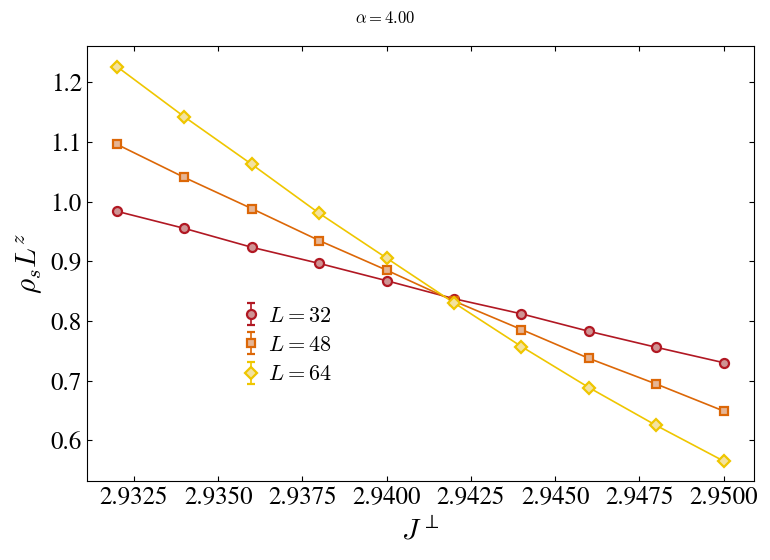

/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


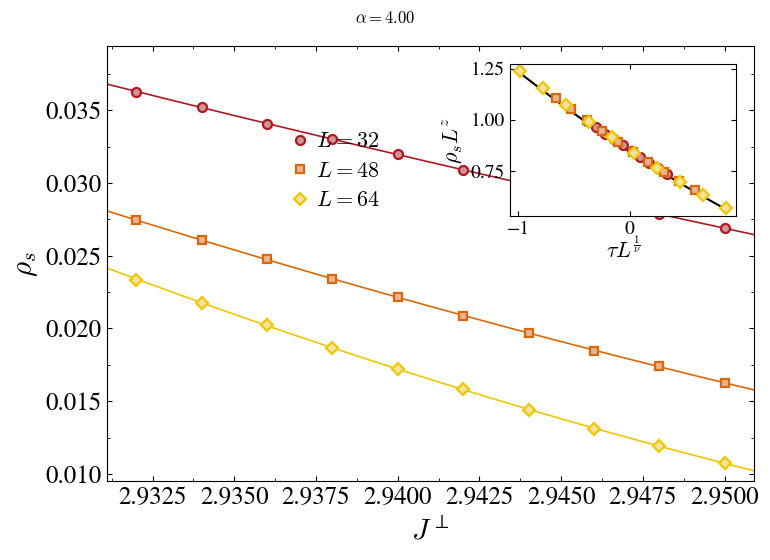

In [63]:
plt.close("all")
dic = parameter_dictJ
alpha = 4.0
index = list(dic["alpha"]).index(alpha)
path = [
    dic["path_to_data"] + "runs" + dic["sigma"][index],
    # "/home/daniel/Master_thesis/Data/runs_Js000",
]
cl_runs = cr.collected_runs(path, True, cutoff=100)

# for run in cl_runs.runs:
#     print(run.params["Lx"],run.g_param,len(run.data["bins"]))

cl_runs.select(LRange=dic["LRange"][index], gRange=dic["gRange"][index])

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*L**(-z)",
    #fstring="f((x/gc - 1)*L**(1/nu))*L**(-z)*(1+c*L**(-omega))",
    vars=["gc", "nu", "z", "c", "omega"],
    polyOrder=2,
)

fit_res = cr.fit_data(
    data,
    fitFunc,
    start_params=[dic["gc"][index], dic["nu"][index], dic["z"][index]],
    fitSummary=True,
)
params, dparams, redChi2, mesg, ierr = fit_res
var = fitFunc.unpack(params)
dvar = fitFunc.unpack(dparams)

print("omega+z = %.3f" % (var["omega"] + var["z"]))

dataCollapse, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
    yfunc="y*L**z",
    arg=var,
    plot=True,
    ylabel=r"$L^z$",
)


fig = cr.plot_fit(
    data,
    fitFunc,
    fit_res,
    xlabel=r"$J^{\perp}$",
    ylabel=r"$\rho_s$",
    loc_legend=(0.25, 0.6, 0.18),
)
fig.suptitle(r"$\alpha = %.2f $" % (cl_runs.runs[0].alpha))

dataCollapse, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
    xfunc="(x/gc-1)*L**(1./nu)",
    #yfunc="y*L**z",
    yfunc="y*L**z/(1+c*L**(-omega))",
    arg=var,
)

inset = cr.plot_DataCollapse(
    dataCollapse,
    fitFunc,
    fit_res,
    xlabel=r"$\tau L^{\frac{1}{\nu}}$",
    ylabel=r"$\rho_s L^{z}$",
    insetFigure=fig,
    loc=3,
)

### Histograms for $g_c, \nu, z, c, \omega, a_i$

In [44]:
params_list = []
dparams_list = []
chi_list = []


for n in range(1000):
    fit_res = cr.fit_data(
        cr.resample(data),
        fitFunc,
        start_params=[dic["gc"][index], dic["nu"][index], dic["z"][index]],
        fitSummary=False,
    )
    params, dparams, redChi2, mesg, ierr = fit_res
    params_list.append(params)
    dparams_list.append(dparams)
    chi_list.append(redChi2)

hist_data = {}
hist_data["chi2"] = chi_list

for i in range(len(fitFunc.vars)):
    name = fitFunc.vars[i]
    err_name = "d" + fitFunc.vars[i]
    hist_data[name] = np.array(params_list)[:, i]
    hist_data[err_name] = np.array(dparams_list)[:, i]


pd.DataFrame.from_dict(hist_data).to_csv("hist_rho_alpha%.2f.csv"%dic["alpha"][index])

/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res) ** 2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
<lambdifygenerated-780>:2: RuntimeWarning: overflow encountered in scalar power
  return L**(-z)*(1 + L**(-omega)*c)*(L**(3/nu)*a3*(-1 + x/gc)**3 + L**(2/nu)*a2*(-1 + x/gc)**2 + L**(nu**(-1.0))*a1*(-1 + x/gc) + a0)
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res) ** 2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWar

gc = 3.182803 +- 0.000069
 nu = 0.733312 +- 0.002455
[3.500000, 3.182803, 0.000069],
[3.500000, 0.733312, 0.002455],


/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


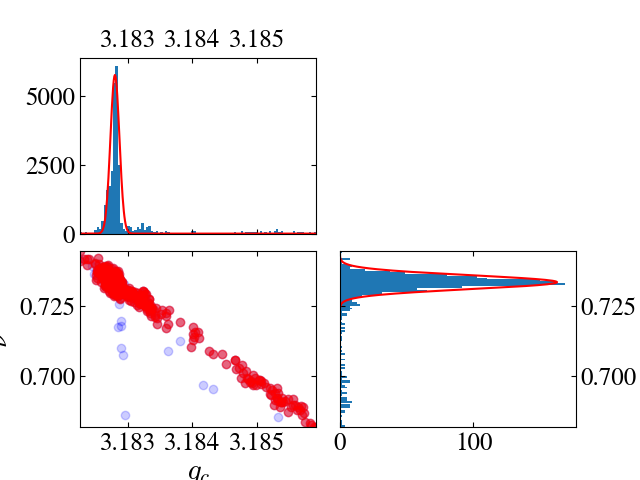

In [47]:
plt.close("all")

dic = parameter_dictJ
alpha = 3.5


index = list(dic["alpha"]).index(alpha)

hist_df = pd.read_csv(
    "/home/daniel/Master_thesis/DataHistJ/hist_rho_alpha%.2f.csv" % dic["alpha"][index]
)

paramsx, paramsy = cr.scatter_histograms(
    hist_df["gc"],
    hist_df["nu"],
    hist_df["chi2"],
    num_bins=100,
    maxChi=10.0,
    xlabel=r"$g_c$",
    ylabel=r"$\nu$",
)

print("gc = %f +- %f\n nu = %f +- %f" % (paramsx[0], paramsx[1], paramsy[0], paramsy[1]))

print("[%f, %f, %f]," % (alpha, paramsx[0], paramsx[1]))
print("[%f, %f, %f]," % (alpha, paramsy[0], paramsy[1]))

# z: $\rho_s L^z = f(U_2/(1+c_U L^{-\omega_u}))(1+c_{\rho_s}L^{-\omega_{\rho_s}})$

chi2/d.o.f = 0.02          
z = 1.0(1)
cS = -1(2)
omegaS = 0.5(3)
a0 = 0.8(9)
a1 = -3(3)
a2 = 6(5)



/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


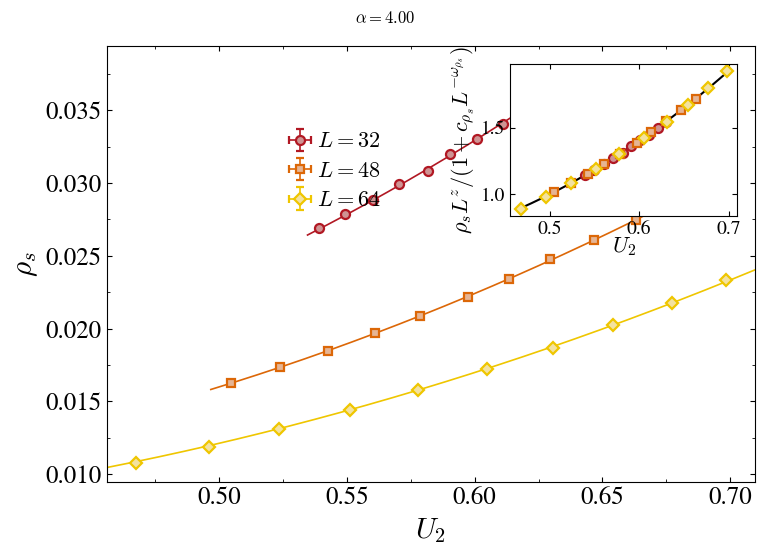

In [72]:
plt.close("all")
dic = parameter_dictJ
alpha = 4.0
index = list(dic["alpha"]).index(alpha)
path = [dic["path_to_data"]+ "runs" + dic["sigma"][index],
        #"/home/daniel/Master_thesis/Data/runs_Js000",
        ]
cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=dic["LRange"][index], gRange=dic["gRange"][index])

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="binder",
    yname="spin_stiffness",
)

fitFunc = cr.fitfunc(
    #fstring="f(x)*L**(-z)",
    #fstring="f(x/(1+cU*L**(-omegaU)))*L**(-z)",
    fstring="f(x)*L**(-z)*(1+cS*L**(-omegaS))",
    vars=["z","cS","omegaS"],
    #vars=["z"],
    polyOrder=2,
)

fit_res = cr.fit_data(data, fitFunc, start_params=[dic["z"][index]], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
var = fitFunc.unpack(params)
dvar = fitFunc.unpack(dparams)

#print("omega+z = %.3f"%(var["omegaS"]+var["z"]))

fig = cr.plot_fit(
    data,
    fitFunc,
    fit_res,
    xlabel=r"$U_2$",
    ylabel=r"$\rho_s$",
    loc_legend=(0.25, 0.6, 0.18),
)
fig.suptitle(r"$\alpha = %.2f $" % (cl_runs.runs[0].alpha))

dataCollapse, _, _ = cl_runs.get_x_vs_y_data(
    xname="binder",
    yname="spin_stiffness",
    #xfunc="x/(1+cU*L**(-omegaU))",
    #yfunc="y*L**z",
    yfunc="y*L**z/(1+cS*L**(-omegaS))",
    arg=var,
)

inset = cr.plot_DataCollapse(
    dataCollapse,
    fitFunc,
    fit_res,
    xlabel=r"$U_2$",
    ylabel=r"$\rho_s L^{z}/(1+c_{\rho_s}L^{-\omega_{\rho_s}})$",
    insetFigure=fig,
    loc=3,
)

### Histograms for $z, c_U, \omega_U, c_{\rho_s}, \omega_{\rho_s}$:

In [188]:
params_list = []
dparams_list = []
chi_list = []


for n in range(1000):
    fit_res = cr.fit_data(
        cr.resample(data),
        fitFunc,
        start_params=[dic["z"][index]],
        fitSummary=False,
    )
    params, dparams, redChi2, mesg, ierr = fit_res
    params_list.append(params)
    dparams_list.append(dparams)
    chi_list.append(redChi2)

hist_data = {}
hist_data["chi2"] = chi_list

for i in range(len(fitFunc.vars)):
    name = fitFunc.vars[i]
    err_name = "d" + fitFunc.vars[i]
    hist_data[name] = np.array(params_list)[:, i]
    hist_data[err_name] = np.array(dparams_list)[:, i]


pd.DataFrame.from_dict(hist_data).to_csv("hist_z_alpha%.2f.csv"%dic["alpha"][index])

/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res) ** 2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res) ** 2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:151: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res) ** 2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid va

/home/daniel/Master_thesis/Python_analysis_tools/Collected_runs.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  paramsx, pcovx = sp.optimize.curve_fit(
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


z = 39.185322 +- 0.010000
 omega = -0.079644 +- 0.077243
[1.500000, 39.185322, 0.010000],
[1.500000, -0.079644, 0.077243],


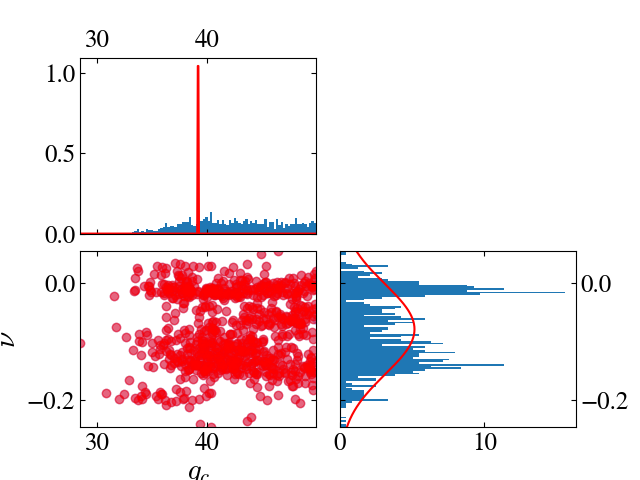

In [59]:
plt.close("all")

dic = parameter_dictJ
alpha = 1.5


index = list(dic["alpha"]).index(alpha)

hist_df = pd.read_csv(
    "/home/daniel/Master_thesis/DataHistJ/hist_z_alpha%.2f.csv" % dic["alpha"][index]
)

paramsx, paramsy = cr.scatter_histograms(
    hist_df["chi2"],
    hist_df["z"],
    hist_df["chi2"],
    num_bins=100,
    maxChi=50.0,
    xlabel=r"$g_c$",
    ylabel=r"$\nu$",
)

print(
    "z = %f +- %f\n omega = %f +- %f" % (paramsx[0], paramsx[1], paramsy[0], paramsy[1])
)

print("[%f, %f, %f]," % (alpha, paramsx[0], paramsx[1]))
print("[%f, %f, %f]," % (alpha, paramsy[0], paramsy[1]))

# Check if @ T= 0:

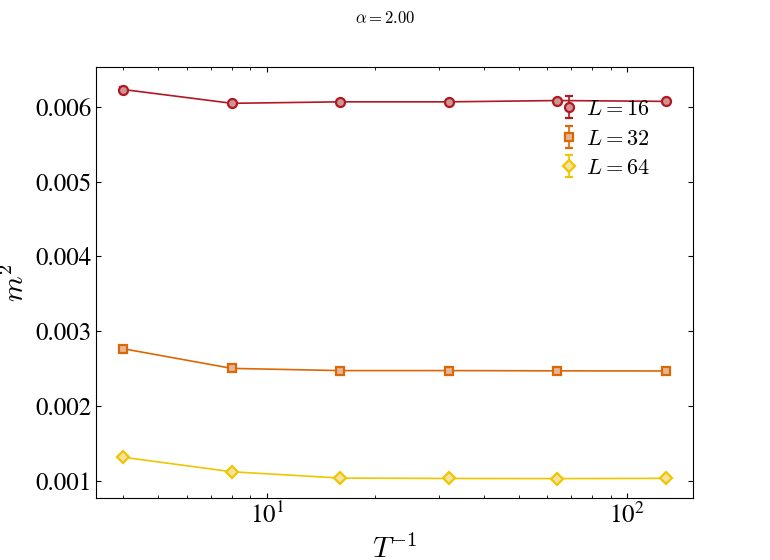

In [9]:
plt.close('all')

path = [f"/home/daniel/Master_thesis/Data/runs_BETAJ5"]

cl_runs = cr.collected_runs(path, False, cutoff=3)

data = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="mag2",
    xfunc="1/x",
    yfunc="y/(Ns**2)",
    plot=True,
    xscale="log",
    yscale="linear",
    xlabel=r"$^{-1}$"
)

# $\chi$

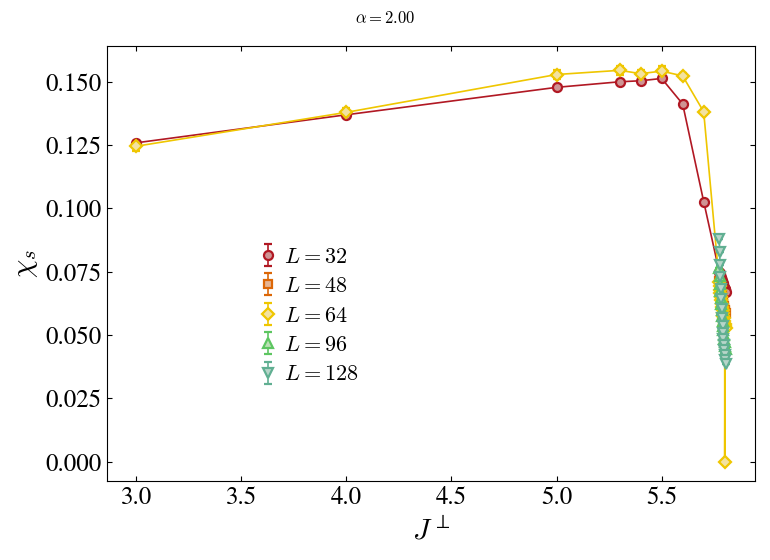

In [15]:
plt.close('all')

path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000",
        "/home/daniel/Master_thesis/Data/runs_CHI"]

cl_runs = cr.collected_runs(path, True, cutoff=10)

data = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="susceptibility_stag",
    xfunc="x",
    yfunc="y/(Ns**2)",
    plot=True,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

# Check $\chi$

Get Data

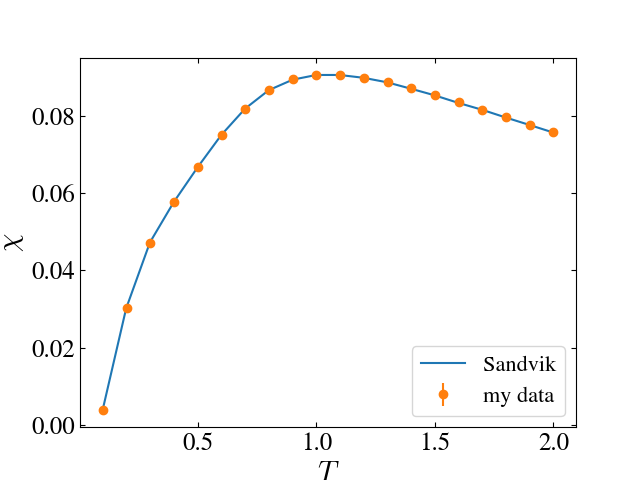

In [13]:
plt.close('all')

sandvik_fig64 = pd.read_csv("/home/daniel/Master_thesis/Data/sandvik_fig64.csv",header=0, sep=",")

sandvik_x = sandvik_fig64["x"]
sandvik_y = sandvik_fig64["y"]

plt.figure()
plt.plot(sandvik_x,sandvik_y, label="Sandvik")


path = [f"/home/daniel/Master_thesis/Data/runs_CHI_test"]

cl_runs = cr.collected_runs(path, False, cutoff=100)

data = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="susceptibility",
    plot=False,
    xfunc="x",
    yfunc="y/(L**3)",
    xscale="linear",
    yscale="linear"
)

plt.errorbar(data[4][:,0],data[4][:,1],data[4][:,2],ls="",marker="o",label="my data")
plt.xlabel(r"$T$")
plt.ylabel(r"$\chi$")
plt.legend()


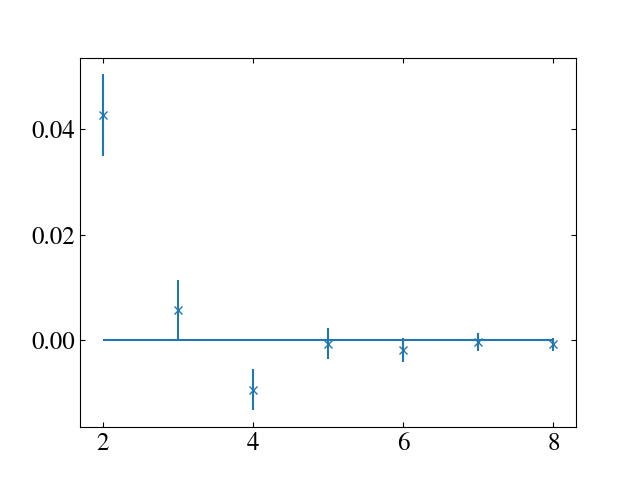

In [40]:
plt.close('all')

path_to_dataT = "/home/daniel/Master_thesis/Data/runs_ED"

cl_runs = cr.collected_runs(path_to_dataT, False, cutoff=1)

tab = cl_runs.get_x_vs_y_data("g_param","energy")[6]

N = cl_runs.runs[0].params["N"]

E_ED = -2.54815333583593144340e+01

x = -np.log2(tab[:,0])

plt.figure()
plt.errorbar(x[:-2],tab[:,1][:-2]-E_ED, tab[:,2][:-2],ls = "",marker = "x")

plt.hlines(0,2,8)
plt.show()

# $\eta$: $m^2$ vs $U_2$: $m^2L^{\eta}=f_{\eta}(U_2/(1+cL^{-\omega}))$

chi2/d.o.f = 38.28         
eta = -2.897(1)
c = -0.815(3)
omega = -0.0095(1)
a0 = 0.259(1)
a1 = 0.0088(4)
a2 = 0.0218(7)

eta = 1.102654


/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


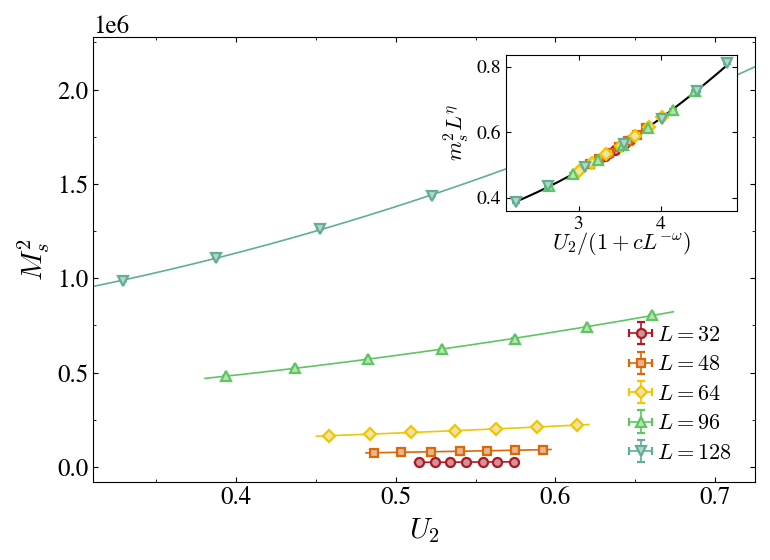

In [ ]:
plt.close("all")
dic = parameter_dictJ
alpha = 4.0
index = list(dic["alpha"]).index(alpha)
path = [
    dic["path_to_data"] + "runs" + dic["sigma"][index],
    # "/home/daniel/Master_thesis/Data/runs_Js000",
]
cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=dic["LRange"][index], gRange=dic["gRange"][index])

data, _, _ = cl_runs.get_x_vs_y_data(xname="binder", yname="mag2", plot=False)


fitFunc = cr.fitfunc(
    fstring="f(x/(1+c*L**(-omega)))*L**(-eta)*2",  # *2 because eta here is eta+4 because of M = m*N = 2*L**2*m
    vars=["eta", "c", "omega"],
    #fstring="f(x)*L**(-eta)*2",
    #vars=["eta"],
    polyOrder=2,
)

fit_res = cr.fit_data(data, fitFunc, start_params=[dic["eta"][index] - 4.0], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
var = fitFunc.unpack(params)
dvar = fitFunc.unpack(dparams)

fig = cr.plot_fit(data, fitFunc, fit_res, xlabel=r"$U_2$", ylabel=r"$M_s^2$")

print("eta = %f" % (var["eta"] + 4))

dataCollapse, _, _ = cl_runs.get_x_vs_y_data(
    xname="binder",
    yname="mag2",
    xfunc="x/(1+c*L**(-omega))",
    yfunc="y*L**(eta)/2",  # /2 because eta here is eta+4 because of M = m*N = 2*L**2*m
    arg=var,
    plot=False,
    xscale="linear",
    yscale="linear",
    xlabel=r"$/(1+cL^{-\omega})$",
    ylabel=r"$L^{\eta}$",
)

inset = cr.plot_DataCollapse(
    dataCollapse,
    fitFunc,
    fit_res,
    xlabel=r"$U_2/(1+cL^{-\omega})$",
    ylabel=r"$m_s^2L^{\eta}$",
    insetFigure=fig,
    loc=3,
)

In [127]:
params_list = []
dparams_list = []
chi_list = []


for n in range(1000):
    fit_res = cr.fit_data(
        cr.resample(data),
        fitFunc,
        start_params=[dic["eta"][index] - 4.0],
        fitSummary=False,
    )
    params, dparams, redChi2, mesg, ierr = fit_res
    params_list.append(params)
    dparams_list.append(dparams)
    chi_list.append(redChi2)

hist_data = {}
hist_data["chi2"] = chi_list

for i in range(len(fitFunc.vars)):
    name = fitFunc.vars[i]
    err_name = "d" + fitFunc.vars[i]
    hist_data[name] = np.array(params_list)[:, i]
    hist_data[err_name] = np.array(dparams_list)[:, i]


pd.DataFrame.from_dict(hist_data).to_csv("hist_eta_alpha%.2f.csv"%dic["alpha"][index])

<lambdifygenerated-2038>:2: RuntimeWarning: overflow encountered in scalar power
  return 2*L**(-eta)*(a0 + a1*x/(1 + L**(-omega)*c) + a2*x**2/(1 + L**(-omega)*c)**2)


/home/daniel/Master_thesis/Python_analysis_tools/Collected_runs.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  paramsx, pcovx = sp.optimize.curve_fit(
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


z = 48.387062 +- 0.010000
 omega = 1.102809 +- 0.003758
[3.500000, 48.387062, 0.010000],
[3.500000, 1.102809, 0.003758],


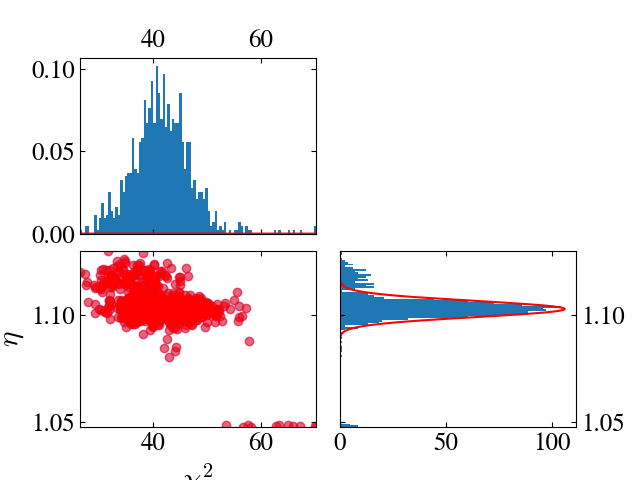

In [55]:
plt.close("all")

dic = parameter_dictJ
alpha = 3.5


index = list(dic["alpha"]).index(alpha)

hist_df = pd.read_csv(
    "/home/daniel/Master_thesis/DataHistJ/hist_eta_alpha%.2f.csv" % dic["alpha"][index]
)

paramsx, paramsy = cr.scatter_histograms(
    hist_df["chi2"],
    hist_df["eta"] + 4,
    hist_df["chi2"],
    num_bins=100,
    maxChi=100.0,
    xlabel=r"$\chi^2$",
    ylabel=r"$\eta$",
)

print(
    "z = %f +- %f\n omega = %f +- %f" % (paramsx[0], paramsx[1], paramsy[0], paramsy[1])
)

print("[%f, %f, %f]," % (alpha, paramsx[0], paramsx[1]))
print("[%f, %f, %f]," % (alpha, paramsy[0], paramsy[1]))

# C(r) Spin correlation

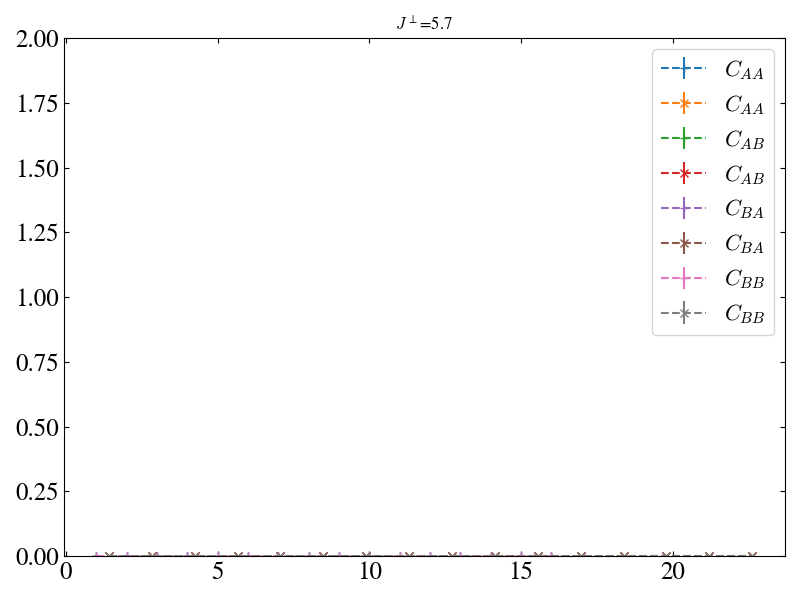

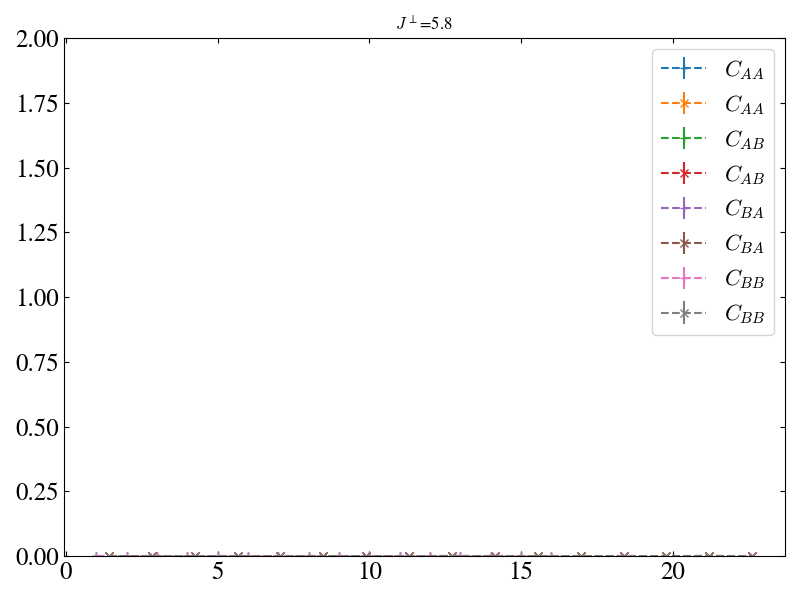

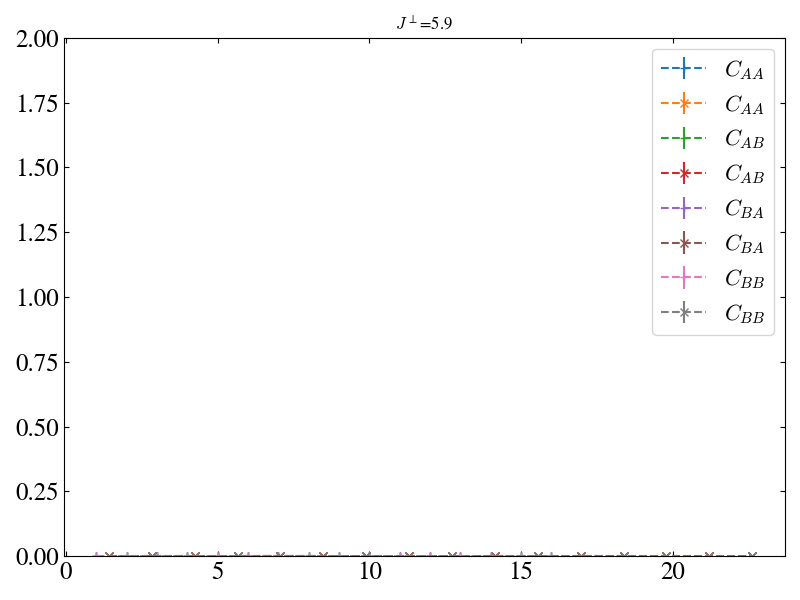

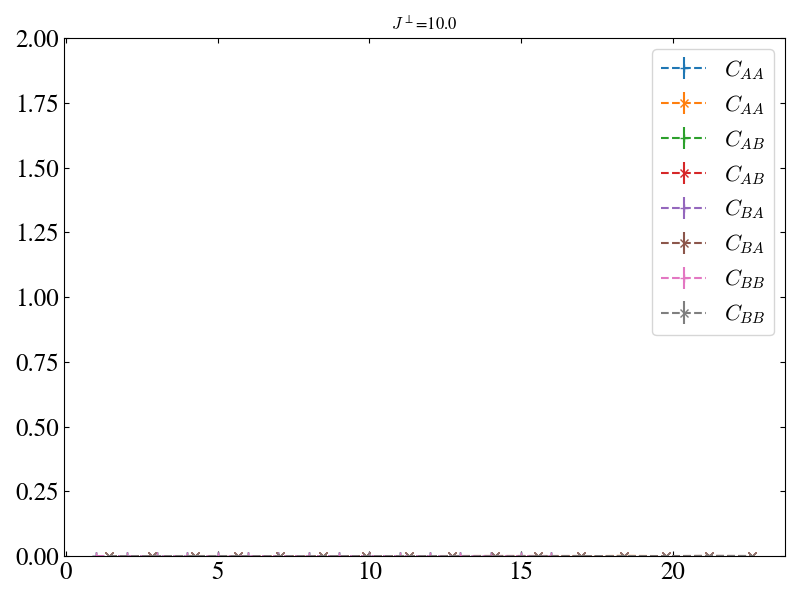

In [10]:
plt.close("all")

path_to_dataT = "/home/daniel/Master_thesis/Data/SPIN_CORR/runs_Js000"
# path_to_dataT = "/home/daniel/Master_thesis/SSE_ED/test_run/"

cl_runs = cr.collected_runs(path_to_dataT, True, cutoff=1)

r0 = 1


for run in cl_runs.L_dict[32]:
    spin_corrX = run.get_spin_correletion("X")
    spin_corrDIAG = run.get_spin_correletion("DIAG")
    plt.figure(figsize=(8, 6))
    plt.title(f"{cl_runs.obs_labels["g_param"]}={run.g_param}")
    for lattice_type in ["AA", "AB", "BA", "BB"]:
        x = spin_corrX["distance"]
        y, err = spin_corrX[lattice_type]

        plt.errorbar(
            x[r0:],
            (y[r0:]),
            yerr=err[r0:],
            ls="--",
            marker="+",
            label=f"$C_{{{lattice_type}}}$",
        )

        x = spin_corrDIAG["distance"]
        y, err = spin_corrDIAG[lattice_type]

        plt.errorbar(
            x[r0:] * np.sqrt(2),
            (y[r0:]),
            yerr=err[r0:],
            ls="--",
            marker="x",
            label=f"$C_{{{lattice_type}}}$",
        )
    plt.legend()
    plt.xscale("linear")
    plt.yscale("linear")
    plt.ylim(0,2)

# Compare with Zhao23 and Song24

In [5]:
nupZhao23 = np.array(
    [  # alpha, mean, err
        [2.30, 1.02932108, 0.03546215],
        [2.50, 1.02949726, 0.03533631],
        [2.70, 1.00060404, 0.03493362],
        [2.90, 0.99131693, 0.03495879],
        [3.00, 1.00113257, 0.03168691],
        [3.05, 1.01031901, 0.03488328],
        [3.10, 1.02081419, 0.03128421],
        [3.15, 1.03100736, 0.03115837],
        [3.20, 1.03445542, 0.03113320],
        [3.30, 1.09020323, 0.03855786],
        [3.40, 1.11079091, 0.07364248],
        [3.50, 1.27936828, 0.07973322],
        [3.60, 1.49898698, 0.11839174],
        [3.70, 1.63819292, 0.12581640],
    ]
)

betaZhao23 = np.array(
    [  # alpha, mean, err
        [2.30, 0.52924515, 0.03442599],
        [2.50, 0.53276764, 0.03373602],
        [2.70, 0.52270857, 0.03476493],
        [2.90, 0.48908149, 0.03500702],
        [3.00, 0.50858229, 0.03129085],
        [3.05, 0.49458916, 0.03475282],
        [3.10, 0.44402750, 0.03113349],
        [3.15, 0.43905244, 0.03141190],
        [3.20, 0.39971191, 0.03112139],
        [3.30, 0.39729095, 0.03809374],
        [3.40, 0.31500266, 0.04201569],
        [3.50, 0.31367114, 0.04538082],
        [3.60, 0.31471215, 0.05574251],
        [3.70, 0.31986878, 0.06959037],
    ]
)

etaZhao23 = np.array(
    [  # alpha, mean, err
        [2.30, 1.00482525, 0.02614361],
        [2.50, 1.00591571, 0.02854261],
        [2.70, 1.00635189, 0.01927376],
        [2.90, 0.99920942, 0.02554386],
        [3.00, 1.01951911, 0.02306308],
        [3.05, 0.96927648, 0.02189085],
        [3.10, 0.92233248, 0.02276321],
        [3.15, 0.88670192, 0.01019574],
        [3.20, 0.79055122, 0.02090944],
        [3.30, 0.71830871, 0.02041873],
        [3.40, 0.61425222, 0.02088218],
        [3.50, 0.49795540, 0.01984625],
        [3.60, 0.41900660, 0.02000981],
        [3.70, 0.38471185, 0.02219072],
    ]
)

TcZhao23 = np.array(
    [  # alpha, mean, err
        [2.30, 5.68075223, 0.06713568],
        [2.50, 3.57807943, 0.03346261],
        [2.70, 2.60208653, 0.02104567],
        [2.90, 2.02985478, 0.02104567],
        [3.00, 1.82160789, 0.02083521],
        [3.05, 1.72427167, 0.02104567],
        [3.10, 1.64471904, 0.02104567],
        [3.15, 1.55590632, 0.02104567],
        [3.20, 1.48677129, 0.00947055],
        [3.30, 1.34808033, 0.00947055],
        [3.40, 1.23264484, 0.00926009],
        [3.50, 1.12815309, 0.00947055],
        [3.60, 1.01587445, 0.00926009],
        [3.70, 0.93021857, 0.00926009],
    ]
)

# Song24

gcSong24 = np.array(
    [
        [2.503793, 14.733212],
        [2.804248, 9.949183],
        [3.001517, 8.257713],
        [3.101669, 7.633394],
        [3.204855, 7.052632],
        [3.405159, 6.275862],
        [3.502276, 5.941924],
        [3.805766, 5.143376],
        [4.003035, 4.751361],
        [4.503794, 4.076225],
        [5.007587, 3.655173],
        [6.006069, 3.168784],
        [8.003035, 2.805808],
        [10.006069, 2.660617],
    ]
)

nupSong24 = np.array(
    [
        [2.50, 0.750483, 0.004128],
        [2.80, 0.750672, 0.004160],
        [3.00, 0.747048, 0.005515],
        [3.10, 0.750515, 0.005074],
        [3.20, 0.751113, 0.004601],
        [3.40, 0.742889, 0.002773],
        [3.50, 0.734632, 0.003908],
        [3.80, 0.714559, 0.002426],
        [4.00, 0.707626, 0.002962],
        [4.50, 0.708004, 0.001985],
        [5.00, 0.709989, 0.002994],
        [6.00, 0.709989, 0.002994],
    ]
)

nuSong24 = np.array(
    [
        [2.50, 2.001289, 0.011008],
        [2.80, 1.251120, 0.006933],
        [3.00, 0.996064, 0.007353],
        [3.10, 0.909715, 0.006150],
        [3.20, 0.834570, 0.005112],
        [3.40, 0.742889, 0.002773],
        [3.50, 0.734632, 0.003908],
        [3.80, 0.714559, 0.002426],
        [4.00, 0.707626, 0.002962],
        [4.50, 0.708004, 0.001985],
        [5.00, 0.709989, 0.002994],
        [6.00, 0.709989, 0.002994],
    ]
)

betaSong24 = np.array(
    [
        [2.50, 0.497140, 0.016121],
        [2.80, 0.499220, 0.013781],
        [3.00, 0.496880, 0.017161],
        [3.10, 0.490769, 0.011701],
        [3.20, 0.500910, 0.013391],
        [3.40, 0.486349, 0.011701],
        [3.50, 0.441235, 0.011181],
        [3.80, 0.392221, 0.011831],
        [4.00, 0.385720, 0.009881],
        [4.50, 0.370899, 0.007151],
        [5.00, 0.367909, 0.006240],
        [6.00, 0.365309, 0.005720],
    ]
)

etaSong24 = np.array(
    [
        [2.50, 1.324852, 0.043576],
        [2.80, 1.330061, 0.037449],
        [3.00, 1.330248, 0.046982],
        [3.10, 1.307820, 0.032410],
        [3.20, 1.333780, 0.036581],
        [3.40, 1.309345, 0.031878],
        [3.50, 1.201241, 0.031103],
        [3.80, 1.097799, 0.033323],
        [4.00, 1.090182, 0.028297],
        [4.50, 1.047732, 0.020412],
        [5.00, 1.036379, 0.018114],
        [6.00, 1.029054, 0.016688],
    ]
)

# My Data

gc_binder = np.array(
    [
        [1.500000, 9.987089, 0.000514],
        [2.000000, 5.795590, 0.000142],
        [2.500000, 4.330173, 0.000168],
        [3.000000, 3.595143, 0.000043],
        [3.500000, 3.183531, 0.000064],
    ]
)

gc_rho = np.array(
    [
        [1.500000, 9.993461, 0.001125],
        [2.000000, 5.794825, 0.000169],
        [2.500000, 4.329952, 0.000046],
        [3.000000, 3.593966, 0.000052],
        [3.500000, 3.182803, 0.000073],
    ]
)

nu_binder = np.array(
    [
        [1.500000, 0.742815, 0.004211],
        [2.000000, 0.723534, 0.001211],
        [2.500000, 0.724534, 0.003294],
        [3.000000, 0.718947, 0.001855],
        [3.500000, 0.710132, 0.003571],
    ]
)

nu_rho = np.array(
    [
        [1.500000, 0.791058, 0.007034],
        [2.000000, 0.734291, 0.001964],
        [2.500000, 0.714565, 0.001018],
        [3.000000, 0.727763, 0.001428],
        [3.500000, 0.733337, 0.002487],
    ]
)

<ErrorbarContainer object of 3 artists>

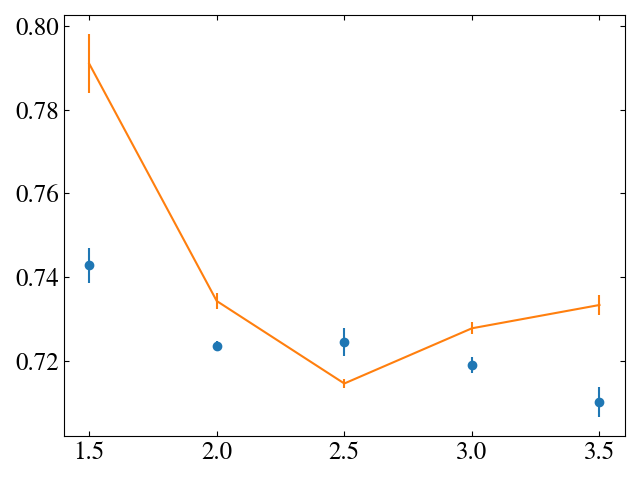

In [60]:
plt.close("all")
plt.errorbar(nu_binder[:,0],nu_binder[:,1],yerr=nu_binder[:,2],marker = "o",ls = "")
plt.errorbar(nu_rho[:,0],nu_rho[:,1],nu_rho[:,2])


chi2/d.o.f = 11.14         
gc = 5.79719(2)
nu = 0.719(1)
c = 3.1(1)
omega = 0.232(6)
a0 = 0.094(3)
a1 = -0.031(1)
a2 = 0.0067(4)



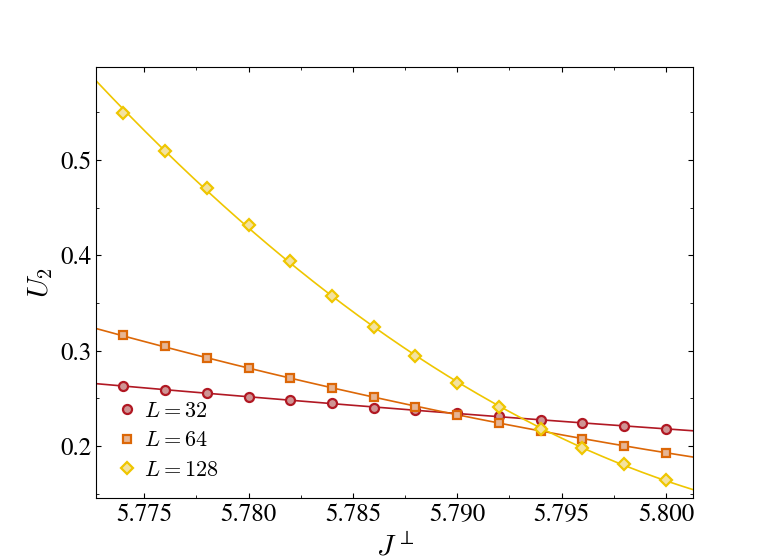

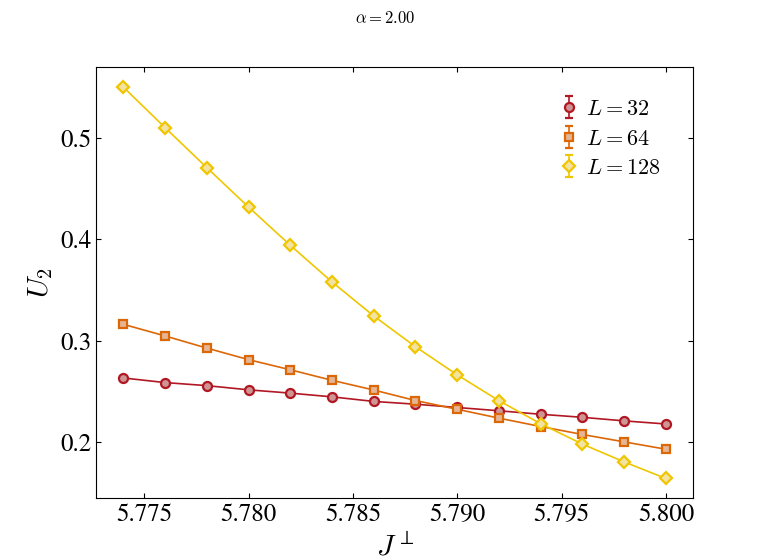

In [34]:
plt.close("all")
#plt.clf()

path = "/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"
#path = "/home/daniel/Master_thesis/Data/runs_BETAJ5"

cl_runs = cr.collected_runs(path, True, cutoff=100)

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param", yname="binder", yfunc="y", xfunc="x", plot=True
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*(1 + c*L**(-omega))",
    #fstring="f((x/gc - 1)*L**(1/nu))",
    vars=["gc", "nu", "c", "omega"],
    polyOrder=2,
)

fit_res = cr.data_fit(cr.resample(data), fitFunc, start_params=[5.8, 0.75], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
fig = cr.fit_plot(data, fitFunc, fit_res, xlabel=r"$J^{\perp}$", ylabel=r"$U_2$")
vars = fitFunc.unpack(params)

# cl_runs.get_x_vs_y_data(
#     xname="g_param",
#     yname="spin_stiffness",
#     yfunc="y*L**(0.1)",
#     xfunc="(x/gc-1)*L**(1/nu)",
#     arg=vars,
#     plot=True,
#     ylabel=f"$L^{-0.25}$",
# )
plt.show()

chi2/d.o.f = 0.24          
z = 0.88(3)
cU = -0.00001(1)
omegaU = -1.7(3)
cS = -1.7(2)
omegaS = 0.35(4)
a0 = 0.23(3)
a1 = 5.7(7)
a2 = 5.7(6)



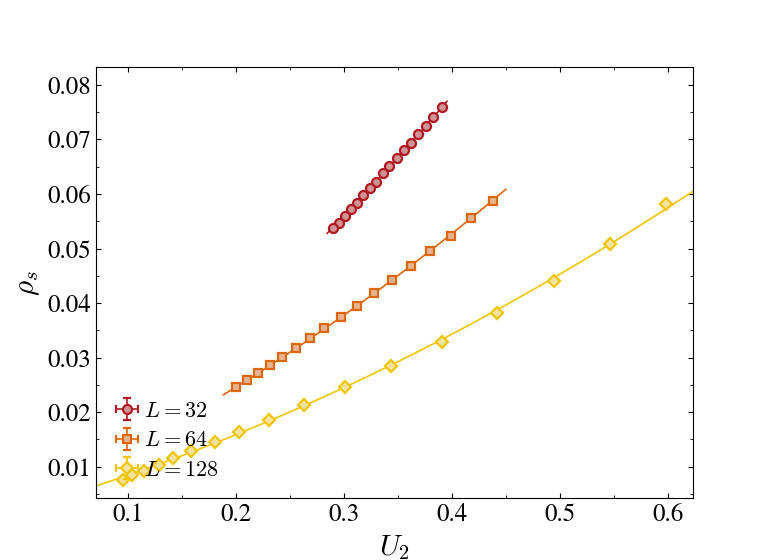

In [77]:
plt.close("all")

path = ["/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js050"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

# cl_runs.select(LRange=[32, 256], gRange=[1.3, 1.346])

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="binder",
    yname="spin_stiffness"
)

fitFunc = cr.fitfunc(
    fstring="f(x/(1+cU*L**(-omegaU)))*(1+cS*L**(-omegaS))*L**(-z)",
    vars=["z","cU","omegaU","cS","omegaS"],
    polyOrder=2,
)

fit_res = cr.data_fit(data, fitFunc, start_params=[1.0], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
vars = fitFunc.unpack(params)
fig = cr.fit_plot(data, fitFunc, fit_res, xlabel=r"$U_2$", ylabel=r"$\rho_s$")

In [65]:
plt.close("all")
path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=[32], gRange=[0.0])

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
    xfunc="x",
    yfunc="y",
    plot=False,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*(1 + c*L**(-omega))*L**(-z)",
    vars=["gc", "nu", "z", "omega", "c"],
    polyOrder=3,
)

z=[]
zpo=[]

for n in range(1000):
    fit_res = cr.data_fit(
        cr.resample(data), fitFunc, start_params=[5.8, 0.75, 0.23], fitSummary=False
    )
    params, dparams, redChi2, mesg, ierr = fit_res
    var = fitFunc.unpack(params)
    dvar = fitFunc.unpack(dparams)

    z.append(var["z"])
    zpo.append(var["z"] + var["omega"])

    # print(
    #     "chi2 = %.2f, z = %.3f, omega = %.3f, z + omega = %.3f"
    #     % (redChi2, var["z"], var["omega"], var["z"] + var["omega"])
    # )

<lambdifygenerated-481>:2: RuntimeWarning: overflow encountered in scalar power
  return L**(-z)*(1 + L**(-omega)*c)*(L**(3/nu)*a3*(-1 + x/gc)**3 + L**(2/nu)*a2*(-1 + x/gc)**2 + L**(nu**(-1.0))*a1*(-1 + x/gc) + a0)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:150: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res)**2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:150: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res)**2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-

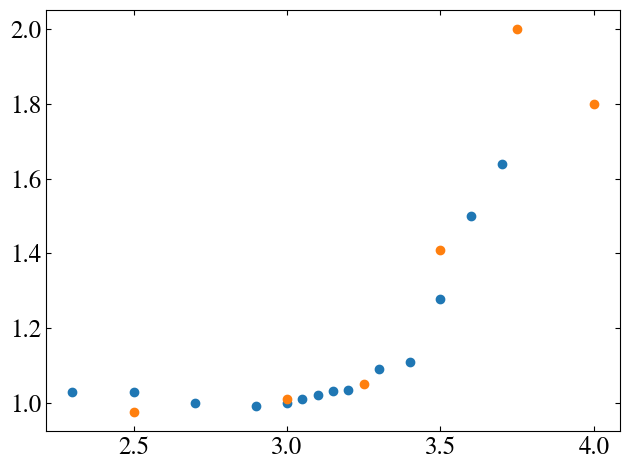

In [118]:
plt.close("all")
#plt.scatter(etaSong24[:,0],etaSong24[:,1])
plt.scatter(nupZhao23[:,0],nupZhao23[:,1])
plt.scatter(parameter_dictT["alpha"]+1, parameter_dictT["nu"])
plt.show()

2.436
1.342
0.917


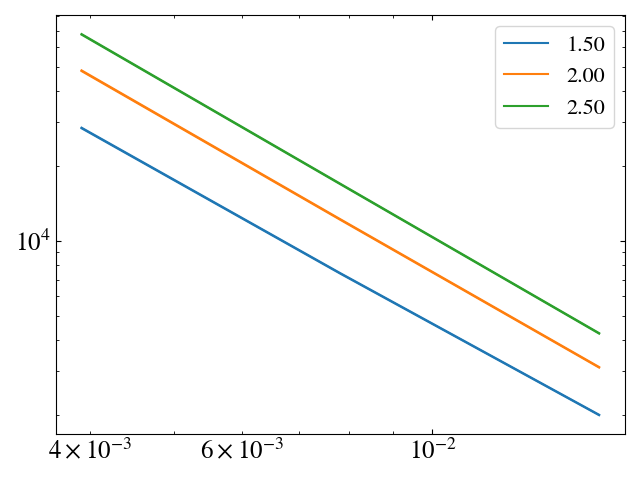

In [50]:
plt.close("all")
dic = parameter_dictT

for alpha in [1.5,2.0,2.5]:
    index = list(dic["alpha"]).index(alpha)
    path = [
        dic["path_to_data"] + "runs" + dic["sigma"][index],
        # "/home/daniel/Master_thesis/Data/runs_Js000",
    ]
    cl_runs = cr.collected_runs(path, False, cutoff=100)

    # for run in cl_runs.runs:
    #     print(run.params["Lx"],run.g_param,len(run.data["bins"]))

    #cl_runs.select(LRange=dic["LRange"][index], gRange=dic["gRange"][index])

    data, fig, ax = cl_runs.get_x_vs_y_data(
        xname="g_param",
        yname="energy",
        plot=False
    )

    gc = dic["gc"][index]
    nearest_index =np.abs(data[64][:,0]-gc).argmin()
    print(data[64][nearest_index,0])

    E0 = []
    Ep2 = []
    Em2 = []
    L_arr = []
    for L in cl_runs.L_list:
        L_arr.append(L)
        E0.append(data[L][nearest_index,1])
        #Ep2.append(data[L][nearest_index+2,1])
        Em2.append(data[L][nearest_index-2,1])

    E0 = np.array(E0)
    #Ep2 = np.array(Ep2)
    Em2 = np.array(Em2)
    L_arr = np.array(L_arr)
    c = plt.plot(1/L_arr,abs(E0/L_arr**0),label = "%.2f"%alpha)[0].get_color()
    #plt.plot(L_arr,abs(Ep2/L_arr**2),color = c)
    plt.plot(1/L_arr,abs(Em2/L_arr**0),color = c)
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()